In [5]:
%matplotlib inline
import math
import os

import matplotlib.pyplot as plt
import numpy as np
from numpy import arange
import pandas as pd

from sklearn.model_selection import train_test_split
import seaborn as sns

from scipy import stats #importa apenas as funções de estatísticas da biblioteca SciPy.

from IPython.display import display  # Para ter melhor print.

In [6]:
filename = 'pokemon.csv'
if filename in os.listdir():
    print(f'Encontrei o arquivo {filename}, tudo certo para prosseguir com a prova!')
else:
    print(f'Não encontrei o arquivo {filename} aqui no diretório {os.getcwd()}, será que você não baixou o arquivo?')

Encontrei o arquivo pokemon.csv, tudo certo para prosseguir com a prova!


In [41]:
dados = pd.read_csv('pokemon.csv')
dados["classfication"]

0             Seed Pokémon
1             Seed Pokémon
2             Seed Pokémon
3           Lizard Pokémon
4            Flame Pokémon
              ...         
796         Launch Pokémon
797    Drawn Sword Pokémon
798      Junkivore Pokémon
799          Prism Pokémon
800     Artificial Pokémon
Name: classfication, Length: 801, dtype: object

In [38]:
print(list(dados))

['abilities', 'against_bug', 'against_dark', 'against_dragon', 'against_electric', 'against_fairy', 'against_fight', 'against_fire', 'against_flying', 'against_ghost', 'against_grass', 'against_ground', 'against_ice', 'against_normal', 'against_poison', 'against_psychic', 'against_rock', 'against_steel', 'against_water', 'attack', 'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate', 'classfication', 'defense', 'experience_growth', 'height_m', 'hp', 'japanese_name', 'name', 'percentage_male', 'pokedex_number', 'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg', 'generation', 'is_legendary']


In [107]:
tipos1 = dados['type1']
l = tipos1.value_counts()

tipos_pokemon=list(l.index) #todos os tipos

print(tipos_pokemon)

['water', 'normal', 'grass', 'bug', 'psychic', 'fire', 'rock', 'electric', 'ground', 'poison', 'dark', 'fighting', 'dragon', 'ghost', 'steel', 'ice', 'fairy', 'flying']


In [67]:
colunas_numericas = ['type1','attack', 'base_total', 'defense', 'height_m', 'hp','sp_attack', 'sp_defense', 'speed','weight_kg']
dados_numericos=dados.loc[:,colunas_numericas]
filtra_grass = dados_numericos['type1']=='grass'
filtra_bug = dados_numericos['type1']=='bug'
filtra_dark = dados_numericos['type1']=='dark'
filtra_dragon = dados_numericos['type1']=='dragon'
filtra_electric = dados_numericos['type1']=='electric'
filtra_fairy = dados_numericos['type1']=='fairy'
filtra_fighting = dados_numericos['type1']=='fighting'
filtra_fire = dados_numericos['type1']=='fire'
filtra_flying = dados_numericos['type1']=='flying'
filtra_ghost = dados_numericos['type1']=='ghost'
filtra_grass = dados_numericos['type1']=='grass'
filtra_ground = dados_numericos['type1']=='ground'
filtra_ice = dados_numericos['type1']=='ice'
filtra_normal = dados_numericos['type1']=='normal'
filtra_rock = dados_numericos['type1']=='rock'
filtra_poison = dados_numericos['type1']=='poison'
filtra_psychic = dados_numericos['type1']=='psychic'
filtra_steel = dados_numericos['type1']=='steel'
filtra_water = dados_numericos['type1']=='water'
dados_numericos['type1'] = dados_numericos['type1'].astype('category')
dados_numericos['type1'].cat.categories = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
dados_numericos

,type1,attack,base_total,defense,height_m,hp,sp_attack,sp_defense,speed,weight_kg
0,9,49,318,49,0.7,45,65,65,45,6.9
1,9,62,405,63,1.0,60,80,80,60,13.0
2,9,100,625,123,2.0,80,122,120,80,100.0
3,6,52,309,43,0.6,39,60,50,65,8.5
4,6,64,405,58,1.1,58,80,65,80,19.0
...,...,...,...,...,...,...,...,...,...,...
796,16,101,570,103,9.2,97,107,101,61,999.9
797,9,181,570,131,0.3,59,59,31,109,0.1
798,1,101,570,53,5.5,223,97,53,43,888.0
799,14,107,600,101,2.4,97,127,89,79,230.0


In [51]:
dados_numericos.describe()

,attack,base_total,defense,height_m,hp,sp_attack,sp_defense,speed,weight_kg
count,801.000000,801.000000,801.000000,781.000000,801.000000,801.000000,801.000000,801.000000,781.000000
mean,77.857678,428.377029,73.008739,1.163892,68.958801,71.305868,70.911361,66.334582,61.378105
std,32.158820,119.203577,30.769159,1.080326,26.576015,32.353826,27.942501,28.907662,109.354766
min,5.000000,180.000000,5.000000,0.100000,1.000000,10.000000,20.000000,5.000000,0.100000
25%,55.000000,320.000000,50.000000,0.600000,50.000000,45.000000,50.000000,45.000000,9.000000
50%,75.000000,435.000000,70.000000,1.000000,65.000000,65.000000,66.000000,65.000000,27.300000
75%,100.000000,505.000000,90.000000,1.500000,80.000000,91.000000,90.000000,85.000000,64.800000
max,185.000000,780.000000,230.000000,14.500000,255.000000,194.000000,230.000000,180.000000,999.900000


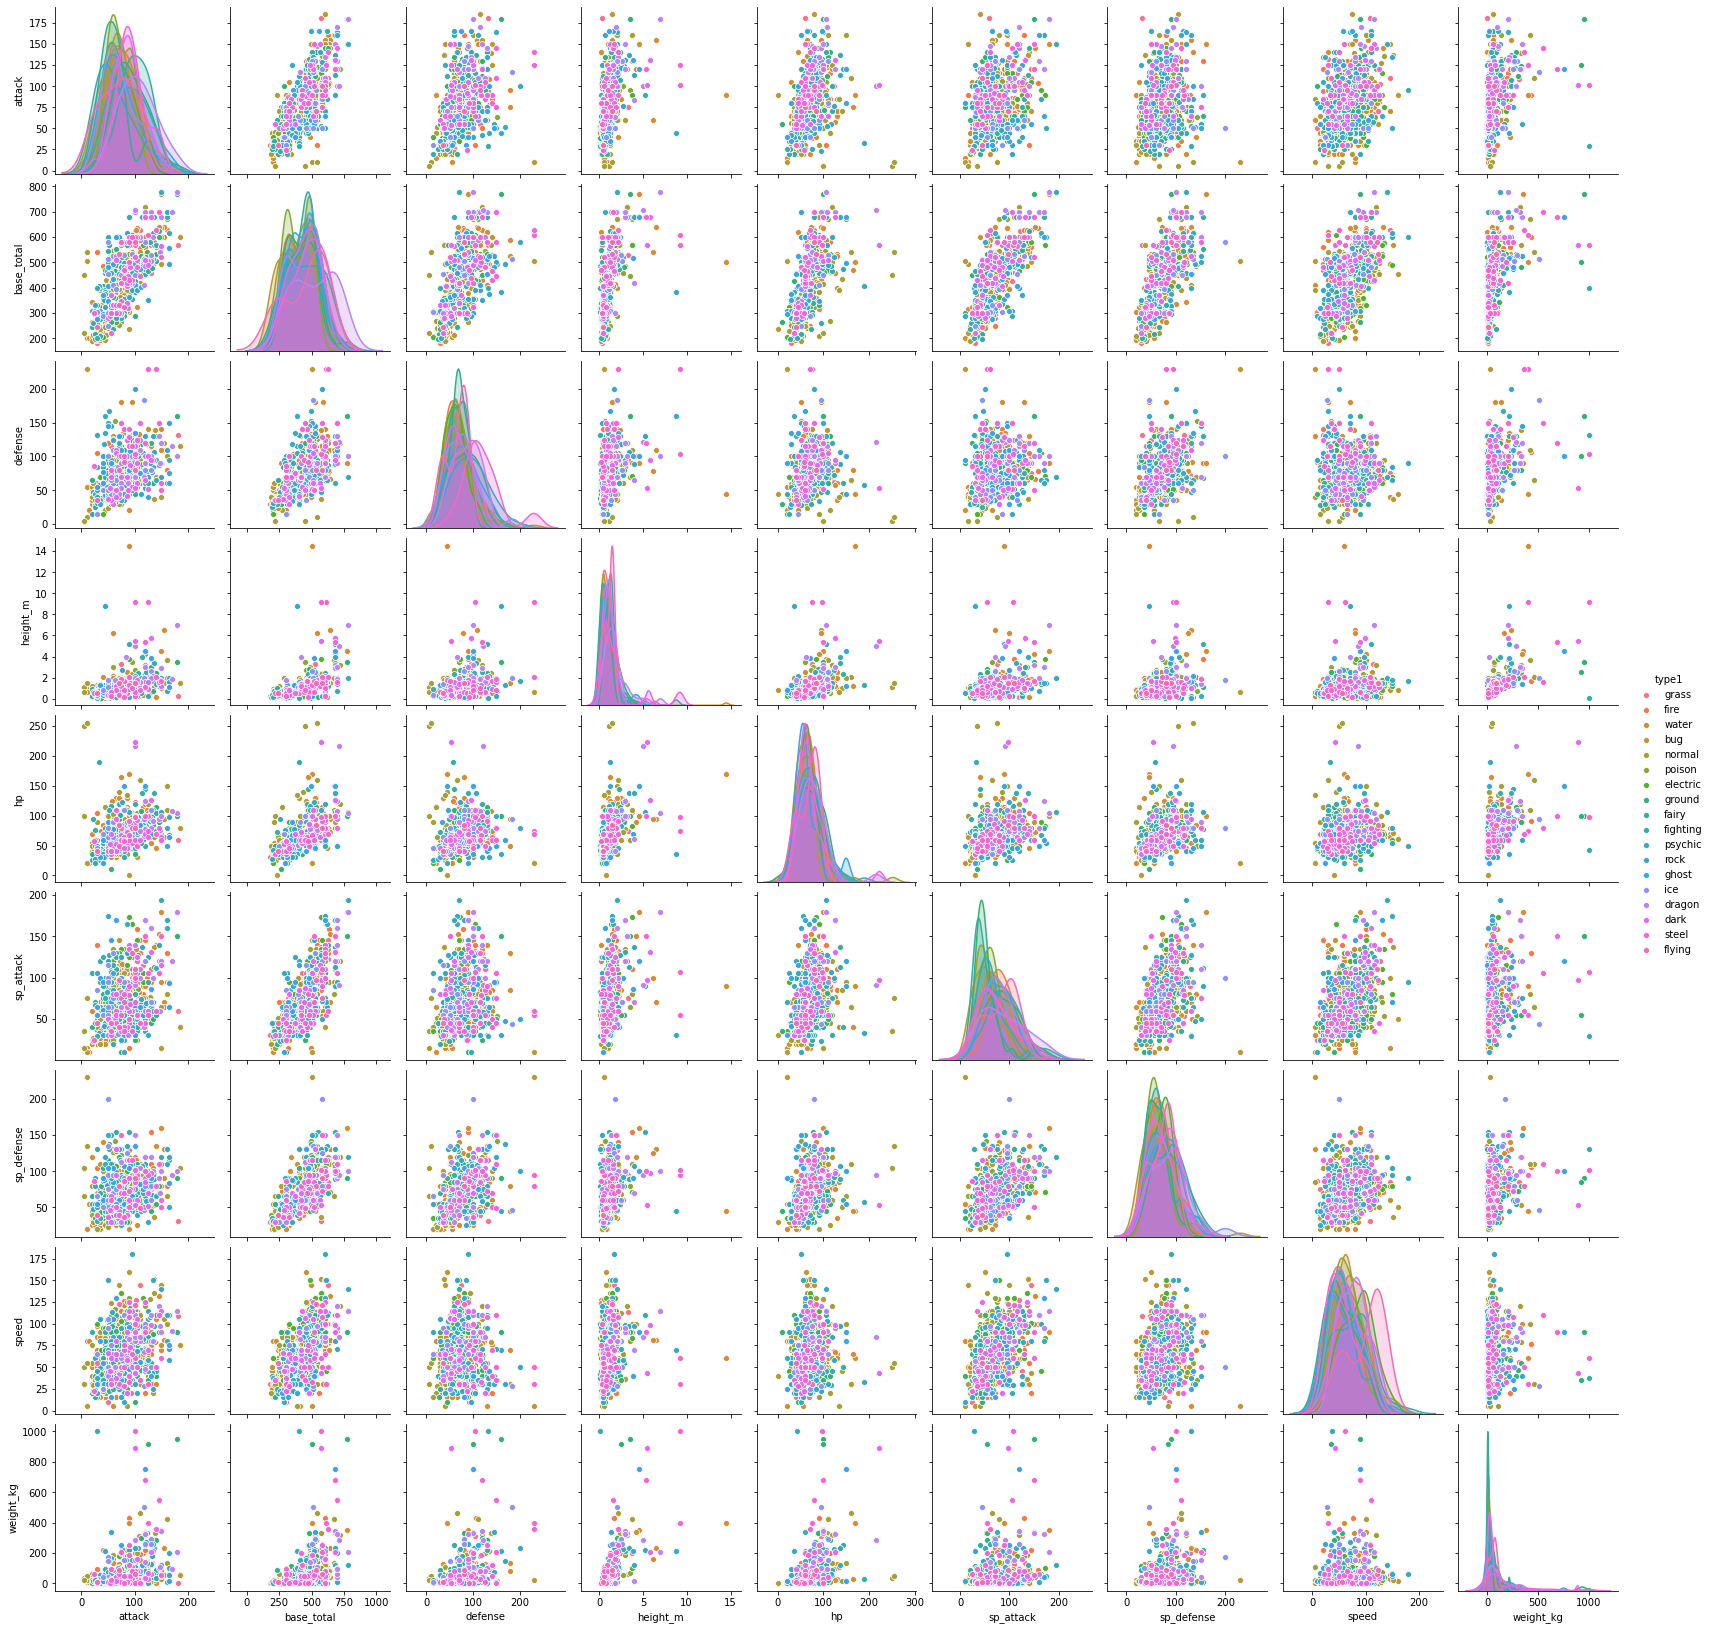

In [52]:
sns.pairplot(dados_numericos,hue='type1')

In [34]:
import statsmodels.api as sm 


x_dados = dados_numericos['speed'] # Definindo renda como explicativa
y_dados = dados_numericos['weight_kg']    # Definindo CO2 como resposta

# Matriz de 1s e valores de x_dados
X_dados = sm.add_constant(x_dados) # Adiciona coluna de 1s para estimar intercepto junto com a coluna de x (dados)

# Define o modelo
model = sm.OLS(y_dados, x_dados)    

# Faz o ajuste
results = model.fit()   

# Mostra os resultados
results.summary()       

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              weight_kg   R-squared (uncentered):                   0.372
Model:                            OLS   Adj. R-squared (uncentered):              0.367
Method:                 Least Squares   F-statistic:                              67.02
Date:                Thu, 03 Jun 2021   Prob (F-statistic):                    4.53e-13
Time:                        08:29:18   Log-Likelihood:                         -644.04
No. Observations:                 114   AIC:                                      1290.
Df Residuals:                     113   BIC:                                      1293.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
speed          0.7769      0.095      8.187      0.000       0.589       0.965
==============================================================================
Omnibus:                       84.172   Durbin-Watson:                   1.791
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              461.405
Skew:                           2.630   Prob(JB):                    6.42e-101
Kurtosis:                      11.335   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

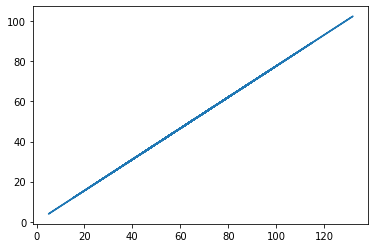

type1         0
attack        0
base_total    0
defense       0
height_m      0
hp            0
sp_attack     0
sp_defense    0
speed         0
weight_kg     0
dtype: int64

In [127]:
y = results.predict()
plt.plot(x_dados,y)
plt.show()
filtro_Nan = dados_numericos["height_m"].isnull()
filtro_Nan2 = dados_numericos["weight_kg"].isnull()
dados_numericos.loc[filtro_Nan,'height_m'] = 0
dados_numericos.loc[filtro_Nan2,'weight_kg'] = 0
dados_numericos.isnull().sum()

In [134]:
dados_train, dados_test = train_test_split(dados_numericos,test_size=0.40, random_state=42)
dados_train['type1'] = dados_train['type1'].astype('category')
dados_train['type1'].cat.categories = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]


<ipython-input-134-0b82a788f50d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_train['type1'] = dados_train['type1'].astype('category')


In [129]:
dados_train.type1

257    17
766     0
544     0
15     12
3       6
       ..
71     17
106     5
270    17
435    16
102     9
Name: type1, Length: 480, dtype: category
Categories (18, int64): [0, 1, 2, 3, ..., 14, 15, 16, 17]

In [130]:
from sklearn import tree
X = dados_train[['attack', 'base_total', 'defense', 'height_m', 'hp','sp_attack', 'sp_defense', 'speed','weight_kg']]
Y = dados_train['type1']
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

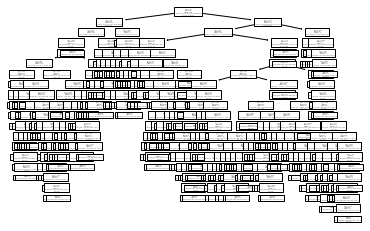

In [131]:
tree.plot_tree(clf);

In [135]:
dicionario = {'column_name':['attack', 'base_total', 'defense', 'height_m', 'hp','sp_attack', 'sp_defense', 'speed','weight_kg'],'feature_importances':list(clf.feature_importances_)}
df = pd.DataFrame(data=dicionario)
df.sort_values("feature_importances",ascending=False)

,column_name,feature_importances
8,weight_kg,0.135100
5,sp_attack,0.124989
0,attack,0.123569
2,defense,0.118506
6,sp_defense,0.115634
1,base_total,0.109781
4,hp,0.106169
7,speed,0.089118
3,height_m,0.077133


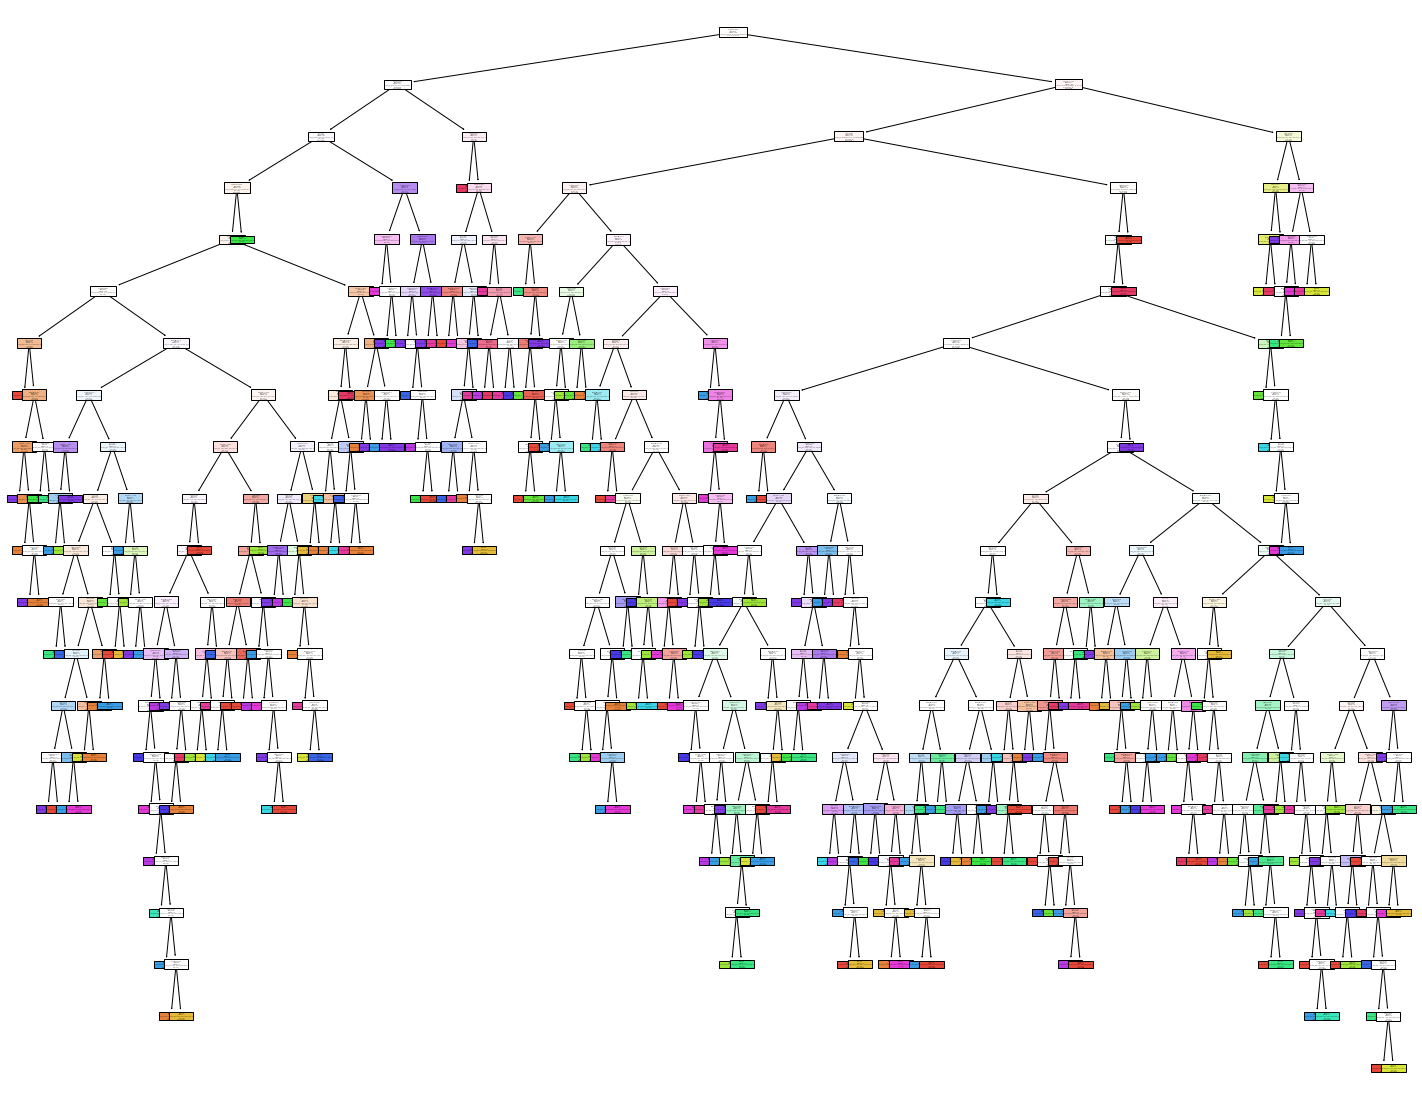

In [114]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=X.columns,  
                   class_names=tipos_pokemon,
                   filled=True)
fig.savefig("decistion_tree.png")

In [133]:
clf.score(X,Y)

1.0